In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e12/sample_submission.csv
/kaggle/input/playground-series-s4e12/train.csv
/kaggle/input/playground-series-s4e12/test.csv


# 

In [2]:
df_train= pd.read_csv('/kaggle/input/playground-series-s4e12/train.csv')
df_train.sample(10)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
632885,632885,57.0,Male,1209.0,Married,NaN,Master's,Employed,22.064317,Rural,...,2.0,16.0,446.0,9.0,2023-05-21 15:21:39.290098,Average,Yes,Monthly,House,1620.0
208132,208132,32.0,Female,16787.0,Married,2.0,PhD,Unemployed,46.148941,Urban,...,NaN,7.0,591.0,8.0,2022-05-08 15:21:39.225916,Poor,No,Daily,Apartment,2376.0
638202,638202,30.0,Male,38509.0,Divorced,1.0,Bachelor's,Employed,43.440139,Suburban,...,4.0,15.0,600.0,1.0,2022-06-14 15:21:39.218388,Average,Yes,Monthly,Condo,744.0
36782,36782,37.0,Male,80177.0,Single,2.0,High School,NaN,17.569800,Urban,...,1.0,13.0,579.0,6.0,2024-05-11 15:21:39.085129,Good,Yes,Rarely,House,315.0
281396,281396,36.0,Female,7565.0,Single,2.0,High School,Self-Employed,14.446730,Suburban,...,0.0,13.0,566.0,8.0,2022-06-07 15:21:39.155231,Average,Yes,Rarely,House,1460.0
853572,853572,31.0,Female,811.0,Single,1.0,PhD,NaN,28.929082,Suburban,...,1.0,19.0,434.0,5.0,2020-12-11 15:21:39.256696,Good,No,Daily,Condo,531.0
912049,912049,51.0,Male,5866.0,Single,3.0,Master's,NaN,25.826891,Rural,...,0.0,4.0,806.0,4.0,2022-11-29 15:21:39.171102,Good,Yes,Rarely,Condo,618.0
221135,221135,52.0,Female,40454.0,Single,4.0,Bachelor's,Employed,14.090248,Urban,...,NaN,13.0,394.0,7.0,2022-09-03 15:21:39.155231,NaN,No,Rarely,Condo,761.0
216999,216999,29.0,Male,46414.0,Divorced,3.0,Master's,Self-Employed,47.079792,Urban,...,0.0,4.0,393.0,1.0,2022-12-04 15:21:39.126661,Poor,Yes,Monthly,House,492.0
133142,133142,42.0,Male,54821.0,Divorced,3.0,Master's,Unemployed,33.927356,Rural,...,2.0,6.0,530.0,2.0,2021-02-08 15:21:39.279729,Poor,Yes,Rarely,House,3833.0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [5]:
numeric_cols = ['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Credit Score','Vehicle Age','Insurance Duration']
categorical_cols = ['Marital Status', 'Occupation','Customer Feedback']

numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

df_train[numeric_cols] = numeric_imputer.fit_transform(df_train[numeric_cols])
df_train[categorical_cols] = categorical_imputer.fit_transform(df_train[categorical_cols])

In [6]:
df_train_encoded= pd.get_dummies(df_train, columns=['Marital Status', 'Occupation','Customer Feedback', 'Gender','Location', 'Policy Type','Smoking Status', 'Exercise Frequency', 'Property Type','Education Level' ], drop_first= True)

In [7]:
df_train_encoded['Policy Start Date']= pd.to_datetime(df_train_encoded['Policy Start Date'])

In [8]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 31 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   id                           1200000 non-null  int64         
 1   Age                          1200000 non-null  float64       
 2   Annual Income                1200000 non-null  float64       
 3   Number of Dependents         1200000 non-null  float64       
 4   Health Score                 1200000 non-null  float64       
 5   Previous Claims              1200000 non-null  float64       
 6   Vehicle Age                  1200000 non-null  float64       
 7   Credit Score                 1200000 non-null  float64       
 8   Insurance Duration           1200000 non-null  float64       
 9   Policy Start Date            1200000 non-null  datetime64[ns]
 10  Premium Amount               1200000 non-null  float64       
 11  Marital Sta

In [9]:
df_train_encoded['Policy Start Date'].isna().sum()

0

In [10]:
df_train_encoded['Policy Start Year']= df_train_encoded['Policy Start Date'].dt.year
df_train_encoded['Policy Start Month']= df_train_encoded['Policy Start Date'].dt.month
df_train_encoded['Policy Start Weekday']= df_train_encoded['Policy Start Date'].dt.weekday
df_train_encoded['Policy Age']= (pd.to_datetime('today') - df_train_encoded['Policy Start Date']).dt.days

In [11]:
df_train_encoded.head()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,...,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House,Education Level_High School,Education Level_Master's,Education Level_PhD,Policy Start Year,Policy Start Month,Policy Start Weekday,Policy Age
0,0,19.0,10049.0,1.0,22.598761,2.0,17.0,372.00000,5.0,2023-12-23 15:21:39.134960,...,True,False,True,False,False,False,2023,12,5,369
1,1,39.0,31678.0,3.0,15.569731,1.0,12.0,694.00000,2.0,2023-06-12 15:21:39.111551,...,False,False,True,False,True,False,2023,6,0,563
2,2,23.0,25602.0,3.0,47.177549,1.0,14.0,592.92435,3.0,2023-09-30 15:21:39.221386,...,True,False,True,True,False,False,2023,9,5,453
3,3,21.0,141855.0,2.0,10.938144,1.0,0.0,367.00000,1.0,2024-06-12 15:21:39.226954,...,False,False,False,False,False,False,2024,6,2,197
4,4,21.0,39651.0,1.0,20.376094,0.0,8.0,598.00000,4.0,2021-12-01 15:21:39.252145,...,True,False,True,False,False,False,2021,12,2,1121


In [12]:
df_train_encoded['month_sin'] = np.sin(2 * np.pi * df_train_encoded['Policy Start Month'] / 12)
df_train_encoded['month_cos'] = np.cos(2 * np.pi * df_train_encoded['Policy Start Month'] / 12)

df_train_encoded['weekday_sin'] = np.sin(2 * np.pi * df_train_encoded['Policy Start Weekday'] / 7)
df_train_encoded['weekday_cos'] = np.cos(2 * np.pi * df_train_encoded['Policy Start Weekday'] / 7)

numerical_features = ['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Credit Score','Vehicle Age','Insurance Duration', 'Policy Age']
scaler = StandardScaler()
df_train_encoded[numerical_features] = scaler.fit_transform(df_train_encoded[numerical_features])

df_train_encoded.drop(['Policy Start Month' , 'Policy Start Weekday',  'Policy Start Date',  'Policy Start Year', 'id'], axis= 1, inplace=True)

In [13]:
df_train_encoded.sample(5)

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Marital Status_Married,...,Property Type_Condo,Property Type_House,Education Level_High School,Education Level_Master's,Education Level_PhD,Policy Age,month_sin,month_cos,weekday_sin,weekday_cos
1131518,-0.234149,-0.082392,-0.747535,-0.332038,-1.222302,-1.656787,0.333627,0.763889,578.0,False,...,True,False,False,True,False,-0.265471,-5.000000e-01,-0.866025,-0.433884,-0.900969
881593,0.212479,-0.720952,-1.487718,0.000000,-0.003278,-1.656787,-0.693995,-0.007023,589.0,False,...,False,False,True,False,False,-0.608751,-2.449294e-16,1.000000,0.781831,0.623490
917013,1.180172,1.075789,-1.487718,-0.940899,-1.222302,0.420713,1.099029,1.149346,275.0,False,...,False,False,False,False,False,1.092308,-5.000000e-01,-0.866025,0.433884,-0.900969
1176480,0.138041,-0.813283,1.473012,1.872356,-1.222302,-0.098662,0.659632,0.763889,1484.0,False,...,False,False,False,True,False,1.527641,-2.449294e-16,1.000000,0.000000,1.000000
45339,1.477924,-0.300757,1.473012,0.488410,-0.003278,1.632588,1.028158,1.534802,837.0,False,...,True,False,True,False,False,1.025186,-8.660254e-01,-0.500000,0.433884,-0.900969


In [14]:
df_train_encoded.drop(['month_sin', 'month_cos', 'weekday_sin', 'weekday_cos'], axis = 1, inplace= True)

In [ ]:
X=df_train_encoded.drop('Premium Amount', axis=1)
y=df_train_encoded['Premium Amount']

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state= 2)





In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [17]:
model = Sequential([
    Dense(512, activation='relu', input_dim=X_train.shape[1]),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='linear')  # Linear for regression
])
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Optimizer with a smaller initial learning rate
optimizer = Adam(learning_rate=5e-5)

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)

# Compile model
model.compile(optimizer=optimizer, loss='mean_squared_logarithmic_error', metrics=['mean_squared_logarithmic_error'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,  # More epochs for better convergence
    batch_size=4096,  # Larger batch size for smoother gradients
    verbose=1,
    callbacks=[early_stopping, lr_scheduler]
)


Epoch 1/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 2.6558 - mean_squared_logarithmic_error: 2.6558 - val_loss: 0.9582 - val_mean_squared_logarithmic_error: 0.9582 - learning_rate: 5.0000e-05
Epoch 2/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5692 - mean_squared_logarithmic_error: 1.5692 - val_loss: 1.1539 - val_mean_squared_logarithmic_error: 1.1539 - learning_rate: 5.0000e-05
Epoch 3/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2588 - mean_squared_logarithmic_error: 1.2588 - val_loss: 1.0855 - val_mean_squared_logarithmic_error: 1.0855 - learning_rate: 5.0000e-05
Epoch 4/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0963 - mean_squared_logarithmic_error: 1.0963 - val_loss: 0.9606 - val_mean_squared_logarithmic_error: 0.9606 - learning_rate: 5.0000e-05
Epoch 5/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9745 - mean_squared_logarithmic_error: 0.9745 - val_loss: 0.8446 - val_mean_squared_logarithmic_error: 0.8446 - learning_rate: 5.00

In [19]:
test_loss = model.evaluate(X_test, y_test, verbose=0)
rmsle = np.sqrt(test_loss[0])
print(f"Test RMSLE: {rmsle}")

Test RMSLE: 0.16756842836367136


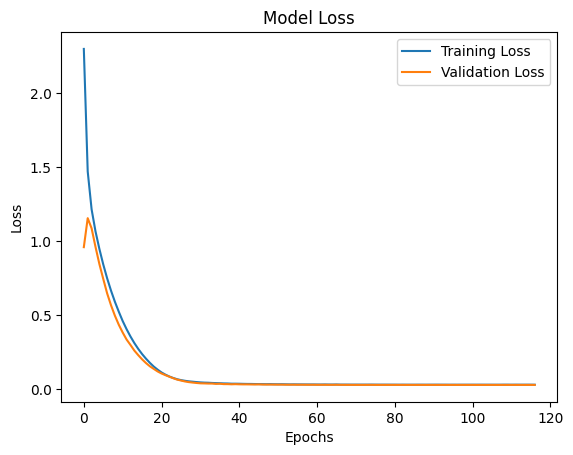

In [20]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:

# Load the test dataset
df_test = pd.read_csv('/kaggle/input/playground-series-s4e12/test.csv')

# Handle missing values
df_test[numeric_cols] = numeric_imputer.transform(df_test[numeric_cols])
df_test[categorical_cols] = categorical_imputer.transform(df_test[categorical_cols])

# Encode categorical columns
df_test_encoded = pd.get_dummies(
    df_test, 
    columns=['Marital Status', 'Occupation', 'Customer Feedback', 'Gender', 'Location', 'Policy Type', 'Smoking Status', 'Exercise Frequency', 'Property Type', 'Education Level'], 
    drop_first=True
)

# Convert 'Policy Start Date' to datetime
df_test_encoded['Policy Start Date'] = pd.to_datetime(df_test_encoded['Policy Start Date'])

# Create new features from 'Policy Start Date'
df_test_encoded['Policy Start Year'] = df_test_encoded['Policy Start Date'].dt.year
df_test_encoded['Policy Start Month'] = df_test_encoded['Policy Start Date'].dt.month
df_test_encoded['Policy Start Weekday'] = df_test_encoded['Policy Start Date'].dt.weekday
df_test_encoded['Policy Age'] = (pd.to_datetime('today') - df_test_encoded['Policy Start Date']).dt.days

# Add cyclic features
df_test_encoded['month_sin'] = np.sin(2 * np.pi * df_test_encoded['Policy Start Month'] / 12)
df_test_encoded['month_cos'] = np.cos(2 * np.pi * df_test_encoded['Policy Start Month'] / 12)
df_test_encoded['weekday_sin'] = np.sin(2 * np.pi * df_test_encoded['Policy Start Weekday'] / 7)
df_test_encoded['weekday_cos'] = np.cos(2 * np.pi * df_test_encoded['Policy Start Weekday'] / 7)

# Scale numerical features
df_test_encoded[numerical_features] = scaler.transform(df_test_encoded[numerical_features])

# Drop unnecessary columns
df_test_encoded.drop(['month_sin','month_cos','weekday_sin','weekday_cos', 'Policy Start Month', 'Policy Start Weekday', 'Policy Start Date', 'Policy Start Year'], axis=1, inplace=True)

# Align test dataset with training dataset columns
missing_cols = set(X_train.columns) - set(df_test_encoded.columns)
for col in missing_cols:
    df_test_encoded[col] = 0  # Add missing columns with 0 values

df_test_encoded = df_test_encoded[X_train.columns]  # Ensure the same column order

# Predict and prepare submission
log_predictions = model.predict(df_test_encoded)
predictions = np.expm1(log_predictions)  # Apply inverse transformation

# Prepare submission file
submission = pd.DataFrame({
    'id': df_test['id'],
    'Premium Amount': predictions.flatten()  # Flatten predictions to a 1D array
})

# Save to CSV
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")


25000/25000 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step
Submission file created: submission.csv
